# LGBM : 48.70890136426143

In [1]:
import os
import sys
import joblib

import pandas as pd 
import numpy as np
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.set_option('display.max_info_columns', 500)

import imp
import datetime
from tqdm import tqdm

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# Data Load

In [14]:
data = joblib.load(os.path.join('..', '..', '0.Data', '01_제공데이터', 'Snd_FE.pkl'))
locals().update(data)

In [21]:
data["X"]

,노출(분),판매단가,방송시간차,상품방송횟수,브랜드방송횟수,조기매진,isHoliday,방송월,방송일,방송시간(분),평일여부,상품군_최고판매단가,상품군_최저판매단가,상품군_평균판매단가,상품군_중간판매단가,상품군_최고-최저,상품군_표준편차,상품군_분산,마더코드_최고판매단가,마더코드_최저판매단가,마더코드_평균판매단가,마더코드_최고-최저,마더코드_분산,마더코드_표준편차,상품군&브랜드_최고판매단가,상품군&브랜드_최저판매단가,상품군&브랜드_평균판매단가,상품군&브랜드_중간판매단가,상품군&브랜드_최고-최저,상품군&브랜드_표준편차,상품군&브랜드_분산,NEW_최고판매단가,NEW_최저판매단가,NEW_평균판매단가,NEW_중간판매단가,NEW_최고-최저,NEW_분산,NEW_표준편차,상품군평균판매단가차이,결합상품,log최근3개월상품군추세,v0,v1,v2,v3,v4,v5,v6,v7,v8,...,결제방법_1.0,결제방법_2.0,방송시간(시간)_1,방송시간(시간)_10,방송시간(시간)_11,방송시간(시간)_12,방송시간(시간)_13,방송시간(시간)_14,방송시간(시간)_15,방송시간(시간)_16,방송시간(시간)_17,방송시간(시간)_18,방송시간(시간)_19,방송시간(시간)_2,방송시간(시간)_20,방송시간(시간)_21,방송시간(시간)_22,방송시간(시간)_23,방송시간(시간)_24,방송시간(시간)_6,방송시간(시간)_7,방송시간(시간)_8,방송시간(시간)_9,방송시간대_0,방송시간대_1,방송시간대_2,방송시간대_23,방송시간대_아침,방송시간대_오전,방송시간대_오후,방송시간대_저녁,계절_가을,계절_겨울,계절_봄,계절_여름,분기_1분기,분기_2분기,분기_3분기,분기_4분기,성별_0,성별_1,성별_2,상품군_가격대_0.0,상품군_가격대_1.0,상품군_가격대_2.0,전체_가격대_0.0,전체_가격대_1.0,전체_가격대_2.0,전체_가격대_3.0,전체_가격대_4.0
0,20.0,39900,0.0,2.0,21.0,0,1,1,1,0,0,2490000.0,29000.0,116562.983425,59900.0,2461000.0,263711.564418,6.954379e+10,69900.0,39900.0,58266.666667,30000.0,1.520024e+08,12328.924566,69900.0,39900.0,58266.666667,59900.0,30000.0,12328.924566,1.520024e+08,39900.0,39900.0,39900.0,39900.0,0.0,0.0,0.000000,76662.983425,0,0.000000,-0.006353,0.001936,-0.001123,0.001262,0.011076,-0.004174,-0.000506,-0.002202,-0.006127,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0
1,20.0,39900,0.0,2.0,21.0,0,1,1,1,0,0,2490000.0,29000.0,116562.983425,59900.0,2461000.0,263711.564418,6.954379e+10,69900.0,39900.0,58266.666667,30000.0,1.520024e+08,12328.924566,69900.0,39900.0,58266.666667,59900.0,30000.0,12328.924566,1.520024e+08,39900.0,39900.0,39900.0,39900.0,0.0,0.0,0.000000,76662.983425,0,0.000000,-0.006655,-0.001535,-0.004239,0.003276,0.003462,-0.002555,-0.000787,-0.004284,-0.004544,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0
2,20.0,39900,0.0,2.0,21.0,0,1,1,1,20,0,2490000.0,29000.0,116562.983425,59900.0,2461000.0,263711.564418,6.954379e+10,69900.0,39900.0,58266.666667,30000.0,1.520024e+08,12328.924566,69900.0,39900.0,58266.666667,59900.0,30000.0,12328.924566,1.520024e+08,39900.0,39900.0,39900.0,39900.0,0.0,0.0,0.000000,76662.983425,0,0.000000,-0.006353,0.001936,-0.001123,0.001262,0.011076,-0.004174,-0.000506,-0.002202,-0.006127,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0
3,20.0,39900,0.0,2.0,21.0,0,1,1,1,20,0,2490000.0,29000.0,116562.983425,59900.0,2461000.0,263711.564418,6.954379e+10,69900.0,39900.0,58266.666667,30000.0,1.520024e+08,12328.924566,69900.0,39900.0,58266.666667,59900.0,30000.0,12328.924566,1.520024e+08,39900.0,39900.0,39900.0,39900.0,0.0,0.0,0.000000,76662.983425,0,0.000000,-0.006655,-0.001535,-0.004239,0.003276,0.003462,-0.002555,-0.000787,-0.004284,-0.004544,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0
4,20.0,39900,0.0,2.0,21.0,0,1,1,1,40,0,2490000.0,29000.0,116562.983425,59900.0,2461000.0,263711.564418,6.954379e+10,69900.0,39900.0,58266.666667,30000.0,1.520024e+08,12328.924566,69900.0,39900.0,58266.666667,59900.0,30000.0,12328.924566,1.520024e+08,39900.0,39900.0,39900.0,39900.0,0.0,0.0,0.000000,76662.983425,0,0.000000,-0.006353,0.001936,-0.001123,0.001262,0.011076,-0.004174,-0.000506,-0.002202,-0.006127,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38299,20.0,158000,3.0,85.0,114.0,0,0,12,31,40,0,1184400.0,24900.0,142329.387755,119000.0,1159500.0

In [22]:
data["y"]

0          2099000.0
1          4371000.0
2          3262000.0
3          6955000.0
4          6672000.0
            ...     
38299      2328000.0
38300     50929000.0
38301     13765000.0
38302    104392000.0
38303     46608000.0
Name: 취급액, Length: 37372, dtype: float64

In [31]:
# 날씨 데이터에 왜 결측치가 있는 것인가 
data["X"].loc[data["X"]["기온(°C)_서울"].isna()]

,노출(분),판매단가,방송시간차,상품방송횟수,브랜드방송횟수,조기매진,isHoliday,방송월,방송일,방송시간(분),평일여부,상품군_최고판매단가,상품군_최저판매단가,상품군_평균판매단가,상품군_중간판매단가,상품군_최고-최저,상품군_표준편차,상품군_분산,마더코드_최고판매단가,마더코드_최저판매단가,마더코드_평균판매단가,마더코드_최고-최저,마더코드_분산,마더코드_표준편차,상품군&브랜드_최고판매단가,상품군&브랜드_최저판매단가,상품군&브랜드_평균판매단가,상품군&브랜드_중간판매단가,상품군&브랜드_최고-최저,상품군&브랜드_표준편차,상품군&브랜드_분산,NEW_최고판매단가,NEW_최저판매단가,NEW_평균판매단가,NEW_중간판매단가,NEW_최고-최저,NEW_분산,NEW_표준편차,상품군평균판매단가차이,결합상품,log최근3개월상품군추세,v0,v1,v2,v3,v4,v5,v6,v7,v8,...,결제방법_1.0,결제방법_2.0,방송시간(시간)_1,방송시간(시간)_10,방송시간(시간)_11,방송시간(시간)_12,방송시간(시간)_13,방송시간(시간)_14,방송시간(시간)_15,방송시간(시간)_16,방송시간(시간)_17,방송시간(시간)_18,방송시간(시간)_19,방송시간(시간)_2,방송시간(시간)_20,방송시간(시간)_21,방송시간(시간)_22,방송시간(시간)_23,방송시간(시간)_24,방송시간(시간)_6,방송시간(시간)_7,방송시간(시간)_8,방송시간(시간)_9,방송시간대_0,방송시간대_1,방송시간대_2,방송시간대_23,방송시간대_아침,방송시간대_오전,방송시간대_오후,방송시간대_저녁,계절_가을,계절_겨울,계절_봄,계절_여름,분기_1분기,분기_2분기,분기_3분기,분기_4분기,성별_0,성별_1,성별_2,상품군_가격대_0.0,상품군_가격대_1.0,상품군_가격대_2.0,전체_가격대_0.0,전체_가격대_1.0,전체_가격대_2.0,전체_가격대_3.0,전체_가격대_4.0
58,20.0,69900,0.0,7.0,29.0,0,0,1,2,0,0,2490000.0,29000.0,116562.983425,59900.0,2461000.0,263711.564418,6.954379e+10,119000.0,49000.0,66071.428571,70000.0,5.516945e+08,23488.177994,119000.0,49000.0,66071.428571,59900.0,70000.0,23488.177994,5.516945e+08,69900.0,69900.0,69900.0,69900.0,0.0,0.0,0.000000,46662.983425,0,0.000000,-0.008963,0.008219,-0.001552,-0.003453,0.007006,-0.002792,0.004837,0.007075,-0.004025,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
59,20.0,69900,0.0,7.0,29.0,0,0,1,2,0,0,2490000.0,29000.0,116562.983425,59900.0,2461000.0,263711.564418,6.954379e+10,119000.0,49000.0,66071.428571,70000.0,5.516945e+08,23488.177994,119000.0,49000.0,66071.428571,59900.0,70000.0,23488.177994,5.516945e+08,69900.0,69900.0,69900.0,69900.0,0.0,0.0,0.000000,46662.983425,0,0.000000,-0.009205,0.005442,-0.004045,-0.001842,0.000914,-0.001497,0.004612,0.005409,-0.002759,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0
60,20.0,69900,0.0,7.0,29.0,0,0,1,2,20,0,2490000.0,29000.0,116562.983425,59900.0,2461000.0,263711.564418,6.954379e+10,119000.0,49000.0,66071.428571,70000.0,5.516945e+08,23488.177994,119000.0,49000.0,66071.428571,59900.0,70000.0,23488.177994,5.516945e+08,69900.0,69900.0,69900.0,69900.0,0.0,0.0,0.000000,46662.983425,0,0.000000,-0.008963,0.008219,-0.001552,-0.003453,0.007006,-0.002792,0.004837,0.007075,-0.004025,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
61,20.0,69900,0.0,7.0,29.0,0,0,1,2,20,0,2490000.0,29000.0,116562.983425,59900.0,2461000.0,263711.564418,6.954379e+10,119000.0,49000.0,66071.428571,70000.0,5.516945e+08,23488.177994,119000.0,49000.0,66071.428571,59900.0,70000.0,23488.177994,5.516945e+08,69900.0,69900.0,69900.0,69900.0,0.0,0.0,0.000000,46662.983425,0,0.000000,-0.009205,0.005442,-0.004045,-0.001842,0.000914,-0.001497,0.004612,0.005409,-0.002759,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0
62,20.0,69900,0.0,7.0,29.0,0,0,1,2,40,0,2490000.0,29000.0,116562.983425,59900.0,2461000.0,263711.564418,6.954379e+10,119000.0,49000.0,66071.428571,70000.0,5.516945e+08,23488.177994,119000.0,49000.0,66071.428571,59900.0,70000.0,23488.177994,5.516945e+08,69900.0,69900.0,69900.0,69900.0,0.0,0.0,0.000000,46662.983425,0,0.000000,-0.009205,0.005442,-0.004045,-0.001842,0.000914,-0.001497,0.004612,0.005409,-0.002759,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38204,20.0,54900,7.0,5.0,10.0,0,0,12,31,40,0,1980000.0,12800.0,167392.349727,99000.0,19672

In [38]:
notorder = data["y"].loc[data["y"].isna()].index
notorder

Int64Index([  143,   144,   147,   153,   154,   159,   238,   242,   244,
              245,
            ...
            37560, 37563, 37564, 37572, 37710, 37711, 37966, 37967, 38026,
            38121],
           dtype='int64', length=1993)

In [43]:
idx = set(X.index) - set(notorder)

In [45]:
X = data["X"].loc[idx]
y = data["y"].loc[idx]

In [46]:
X.shape, y.shape

((35379, 481), (35379,))

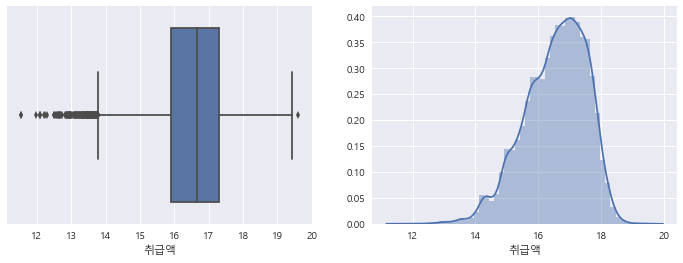

In [47]:
# log변환 후의 y  
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,4)

sns.boxplot(np.log1p(y), ax=ax1)
sns.distplot(np.log1p(y), ax=ax2)

In [50]:
X = X.fillna(0)

In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35379 entries, 0 to 38303
Data columns (total 481 columns):
노출(분)                                                 35379 non-null float64
판매단가                                                  35379 non-null int64
방송시간차                                                 35379 non-null float64
상품방송횟수                                                35379 non-null float64
브랜드방송횟수                                               35379 non-null float64
조기매진                                                  35379 non-null int64
isHoliday                                             35379 non-null int64
방송월                                                   35379 non-null int64
방송일                                                   35379 non-null int64
방송시간(분)                                               35379 non-null int64
평일여부                                                  35379 non-null int64
상품군_최고판매단가                                            353

# Modeling

In [52]:
import random

In [53]:
import warnings
warnings.filterwarnings(action='ignore')

In [54]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [55]:
import lightgbm as lgb

In [56]:
lgb_params = {'learning_rate': 0.03, 'max_depth' : 16, 'objective': 'regression', 'metric': 'mape', 'is_training_metric': True,
              'min_child_samples' : 40, 'n_estimators' : 2000, 'num_leaves' : 8, 'subsample' : 0.6}

In [58]:
y = np.log1p(y)

In [60]:
preds = []
idx = [] 
feat_imp = [0] * len(X.columns)

final_y = [] # 최종 예측한 값 

for i in range(1,13):
    # 한달에서도 랜덤 샘플 반 뽑기
    test_idx = random.sample(list(X[X['방송월'] == i].index), int(len(X[X['방송월'] == i]) / 2))
    train_idx = set(X.index) - set(test_idx)
    
    train = X.loc[train_idx]
    test = X.loc[test_idx]
    y_test = y.loc[test_idx]
    
    x_train = train[train['방송월'] != i]
    y_train = y.loc[train[train['방송월'] != i].index]
    
    x_val = train[train['방송월'] == i]
    y_val = y.loc[train[train['방송월'] == i].index]
    
    train_T = lgb.Dataset(x_train.values, label=y_train.values) 
    val_T = lgb.Dataset(x_val.values, label=y_val.values)
    
    
    model2 = lgb.train(lgb_params, train_T, 3000, valid_sets = val_T, verbose_eval=500, early_stopping_rounds=500)
    lgb_pred = model2.predict(test.values)

    
    preds.append(mean_absolute_percentage_error(np.exp(y_test), np.exp(lgb_pred)))
    feat_imp += model2.feature_importance()
    
    final_y.append(np.exp(lgb_pred))
    idx.append(test_idx)
    
    print(preds)
    
print(np.mean(preds))

Training until validation scores don't improve for 500 rounds
[500]	valid_0's mape: 0.026181
[1000]	valid_0's mape: 0.0246986
[1500]	valid_0's mape: 0.0241356
[2000]	valid_0's mape: 0.0239691
Did not meet early stopping. Best iteration is:
[1975]	valid_0's mape: 0.0239546
[52.0872852845891]
Training until validation scores don't improve for 500 rounds
[500]	valid_0's mape: 0.0265907
[1000]	valid_0's mape: 0.0247131
[1500]	valid_0's mape: 0.0238765
[2000]	valid_0's mape: 0.0233624
Did not meet early stopping. Best iteration is:
[2000]	valid_0's mape: 0.0233624
[52.0872852845891, 47.45047039245817]
Training until validation scores don't improve for 500 rounds
[500]	valid_0's mape: 0.0277835
[1000]	valid_0's mape: 0.0268324
[1500]	valid_0's mape: 0.0263428
[2000]	valid_0's mape: 0.0261789
Did not meet early stopping. Best iteration is:
[1999]	valid_0's mape: 0.0261789
[52.0872852845891, 47.45047039245817, 52.28093748229728]
Training until validation scores don't improve for 500 rounds
[50

In [72]:
month = [1,2,3,4,5,6,7,8,9,10,11,12]

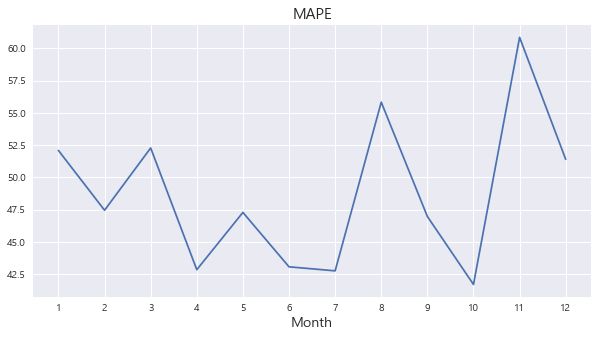

In [75]:
plt.figure(figsize = (10, 5))
sns.lineplot(x = month, y=preds)
plt.xlabel('Month', fontsize = 14)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title('MAPE', fontsize = 15)
plt.show()

In [76]:
feature_importance = pd.DataFrame({'feature' : X.columns, 
                                   'importance' : feat_imp / 12}).sort_values(by='importance', ascending=False)

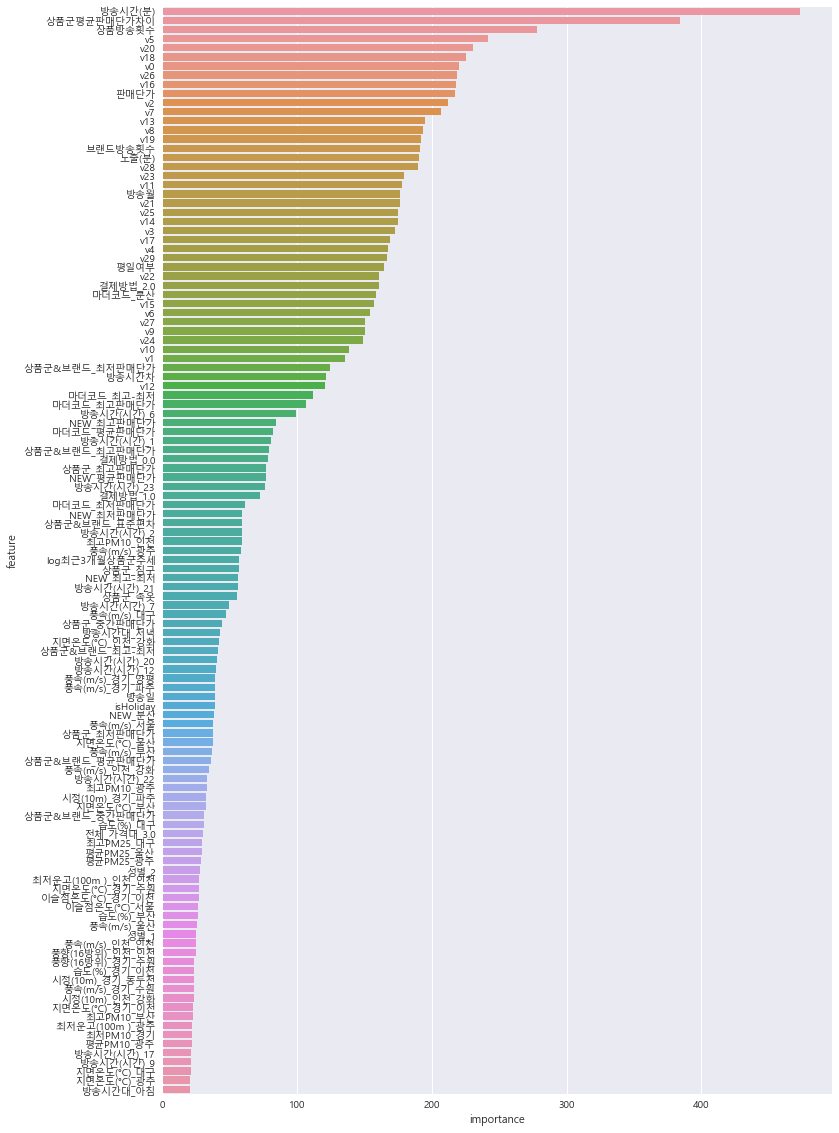

In [77]:
fig, ax = plt.subplots(figsize=(12,20))

sns.barplot(
    data= feature_importance[feature_importance["importance"] > 20],
    x= "importance",
    y= "feature"
)

In [78]:
feature_importance.head(25)

,feature,importance
9,방송시간(분),473.666667
38,상품군평균판매단가차이,384.500000
3,상품방송횟수,278.083333
46,v5,241.416667
61,v20,230.500000
59,v18,225.333333
41,v0,220.000000
67,v26,218.416667
57,v16,218.000000
1,판매단가,216.750000
